<a href="https://colab.research.google.com/github/Rahulkrishna07/Book-recommender-system/blob/main/NLP_BASICS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import spacy

In [3]:
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [4]:
df= pd.read_csv("https://raw.githubusercontent.com/laxmimerit/twitter-data/refs/heads/master/twitter4000.csv",encoding='latin1', header=0)

In [5]:
df


,twitts,sentiment
0,is bored and wants to watch a movie any sugge...,0
1,back in miami. waiting to unboard ship,0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0
3,ughhh i am so tired blahhhhhhhhh,0
4,@mandagoforth me bad! It's funny though. Zacha...,0
...,...,...
3995,i just graduated,1
3996,Templating works; it all has to be done,1
3997,mommy just brought me starbucks,1
3998,@omarepps watching you on a House re-run...lov...,1


WORD COUNT

In [6]:
len('this is text'.split())

3

In [7]:
df['word_count']= df['twitts'].apply(lambda x: len(str(x).split()))

In [8]:
print(df.columns)

Index(['twitts', 'sentiment', 'word_count'], dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   twitts      4000 non-null   object
 1   sentiment   4000 non-null   int64 
 2   word_count  4000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 93.9+ KB


In [10]:
df.head()

,twitts,sentiment,word_count
0,is bored and wants to watch a movie any sugge...,0,10
1,back in miami. waiting to unboard ship,0,7
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12
3,ughhh i am so tired blahhhhhhhhh,0,6
4,@mandagoforth me bad! It's funny though. Zacha...,0,26


In [11]:
df['r']= df['twitts'].apply(lambda x: len(str(x).split()))

In [12]:
df['word_count'].max()

32

In [13]:
df['word_count'].min()

1

In [14]:
df[df['word_count']==1]

,twitts,sentiment,word_count,r
385,homework,0,1,1
691,@ekrelly,0,1,1
1124,disappointed,0,1,1
1286,@officialmgnfox,0,1,1
1325,headache,0,1,1
1897,@MCRmuffin,0,1,1
2542,Graduated!,1,1,1
2947,reading,1,1,1
3176,@omeirdeleon,1,1,1
3470,www.myspace.com/myfinalthought,1,1,1


CHARACTER COUNT

In [15]:
df['char_counts'] = df['twitts'].apply(lambda x: len(x))

In [16]:
def char_counts(x):
    s= x.split()
    x = ''.join(s)
    return len(x)

AVERAGE WORD LENGTH


In [17]:
x = 'this is'
y = 'thank you'

In [18]:
df['avg'] = df['char_counts']/df['word_count']

In [19]:
print(df['avg'])

0       5.300000
1       5.714286
2       5.500000
3       5.500000
4       5.461538
          ...   
3995    5.666667
3996    5.125000
3997    6.400000
3998    6.625000
3999    4.937500
Name: avg, Length: 4000, dtype: float64


In [20]:
df.sample(5)

,twitts,sentiment,word_count,r,char_counts,avg
3430,@riandawson Thx 4 the awesum show. u guys neve...,1,27,27,138,5.111111
6,@kevinmarquis haha yep but i really need to sl...,0,22,22,116,5.272727
3646,catie and kaila r comin over!,1,6,6,30,5.000000
2066,@gonetotimbuktu absolutely! love love love tha...,1,14,14,100,7.142857
2375,I am really hyped about this site. I have a f...,1,26,26,135,5.192308


stopwords

In [21]:
len(stopwords)

326

In [22]:
print(stopwords)

{'with', 'please', 'would', 'how', 'it', 'has', 'enough', 'keep', 'thru', 'anyone', 'herself', 'within', 'off', 'afterwards', 'using', 'make', 'was', 'besides', 'while', 'cannot', 'last', 'never', 'more', 'no', 'sixty', 'does', 'nevertheless', '’s', 'sometimes', 'than', 'twelve', '‘re', 'throughout', 'my', 'ours', 'who', 'just', 'thereby', 'should', 'part', 'next', '’d', 'each', 'various', 'before', '‘s', 'of', 'his', 'are', 'name', 'whether', 'thereafter', 'made', 'any', 'anything', 'against', 'four', 'why', 'or', '‘d', 'out', 'everything', 'into', 'meanwhile', 'beyond', 'which', 'when', 'you', "'m", 'is', 'ever', 'wherever', 'well', 'bottom', 'its', 'hundred', 'so', 'except', 'whole', 'must', 'hereby', 'as', 'herein', 'least', 'that', 'to', 'few', 'still', 'almost', 'fifteen', 'whatever', 'same', 'we', 'full', 'even', 'hers', 'nor', 'ca', 'though', 'such', 'wherein', 'say', 'becoming', 'us', 'down', "n't", 'several', 'her', 'them', 'until', 'can', 'only', 'twenty', 'below', 'side', '

In [23]:
len(df)

4000

In [24]:
u= 326/4000*100

In [25]:
print(u)

8.15


In [26]:
r = ' this is the text data'

In [27]:
r.split()

['this', 'is', 'the', 'text', 'data']

In [28]:
stopwords

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [29]:
e = 'this is the text data'

In [30]:
e.split()

['this', 'is', 'the', 'text', 'data']

In [31]:
# checking for stopwords in he b aive line

In [32]:
[t for t in e.split() if t in stopwords]

['this', 'is', 'the']

In [33]:
len([t for t in e.split() if t in stopwords])

3

In [34]:
df['stopwordslen']=df['twitts'].apply(lambda x: len([t for t in x.split() if t in stopwords]))

In [35]:
df.head()

,twitts,sentiment,word_count,r,char_counts,avg,stopwordslen
0,is bored and wants to watch a movie any sugge...,0,10,10,53,5.300000,5
1,back in miami. waiting to unboard ship,0,7,7,40,5.714286,3
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,12,66,5.500000,0
3,ughhh i am so tired blahhhhhhhhh,0,6,6,33,5.500000,3
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,26,142,5.461538,13


count hashtags and mentions

In [36]:
p= 'this is #hashtag and this is @mention'

In [37]:
p.split()

['this', 'is', '#hashtag', 'and', 'this', 'is', '@mention']

In [38]:
for t in p.split():
    if t.startswith('#'):
        print(t)

#hashtag


In [39]:
for t in p.split():
    if t.startswith('@'):
        print(t)

@mention


In [40]:
 [t for t in p.split() if t.startswith('@')]

['@mention']

In [41]:
df['hastatag']=df['twitts'].apply(lambda x:[t for t in p.split() if t.startswith('@')])

In [42]:
df.head()

,twitts,sentiment,word_count,r,char_counts,avg,stopwordslen,hastatag
0,is bored and wants to watch a movie any sugge...,0,10,10,53,5.300000,5,[@mention]
1,back in miami. waiting to unboard ship,0,7,7,40,5.714286,3,[@mention]
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,12,66,5.500000,0,[@mention]
3,ughhh i am so tired blahhhhhhhhh,0,6,6,33,5.500000,3,[@mention]
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,26,142,5.461538,13,[@mention]


NUMBER CHECK

In [43]:
c = ' this is 1 and 2 '

In [44]:
c.split()

['this', 'is', '1', 'and', '2']

In [45]:
c.split()[3].isdigit()

False

In [46]:
df['twitts'].apply(lambda c: len ([t for t in c.split() if t.isdigit()]))

,twitts
0,0
1,0
2,0
3,0
4,0
...,...
3995,0
3996,0
3997,0
3998,0


In [47]:
df['digit'] = df['twitts'].apply(lambda c: len ([t for t in c.split() if t.isdigit()]))

In [48]:
df.head()

,twitts,sentiment,word_count,r,char_counts,avg,stopwordslen,hastatag,digit
0,is bored and wants to watch a movie any sugge...,0,10,10,53,5.300000,5,[@mention],0
1,back in miami. waiting to unboard ship,0,7,7,40,5.714286,3,[@mention],0
2,"@misskpey awwww dnt dis brng bak memoriessss, ...",0,12,12,66,5.500000,0,[@mention],0
3,ughhh i am so tired blahhhhhhhhh,0,6,6,33,5.500000,3,[@mention],0
4,@mandagoforth me bad! It's funny though. Zacha...,0,26,26,142,5.461538,13,[@mention],0


In [49]:
################

In [50]:
########

In [51]:
x = 'I AM HAPPY'
y = ' i am happy'

In [52]:
[t for t in x.split() if t.isupper()]

['I', 'AM', 'HAPPY']

In [53]:
df['upper_counts'] = df['twitts'].apply(lambda x: len([t for t in x.split() if t.isupper()]))

In [54]:
##### contraction


In [55]:
s = "i'm dont he'll"


In [56]:
def cont_to_exp(s):
  if type(s) is str:
    for key in contractions:
      value = contractions[key]
      s = s.replace(key, value)
    return s
  else:
    return s

In [57]:
cont_to_exp(s)

NameError: name 'contractions' is not defined

In [58]:
#### emails


In [60]:
df[df['twitts'].str.contains('gmail.com')]

,twitts,sentiment,word_count,r,char_counts,avg,stopwordslen,hastatag,digit,upper_counts
2448,"when I click my Firefox 'most visited' tab, af...",1,17,17,96,5.647059,5,[@mention],0,1


In [61]:
df.iloc[2448]['twitts']

"when I click my Firefox 'most visited' tab, after my gmail comes 'twitter / over capacity' nice "

In [62]:
df[df['twitts'].str.contains('hotmail.com')]

,twitts,sentiment,word_count,r,char_counts,avg,stopwordslen,hastatag,digit,upper_counts
3713,@securerecs arghh Me Please markbradbury_16@h...,1,5,5,56,11.2,0,[@mention],0,0


In [63]:
x = '@securerecs arghh Me Please markbradbury_16@hotmail.com'

In [64]:
import re

In [65]:
re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x)

['markbradbury_16@hotmail.com']

In [66]:
df['emails'] = df['twitts'].apply(lambda x: re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',x))

In [67]:
df['emails_counts'] = df['emails'].apply(lambda x :len(x))

In [68]:
### URLS and remove it

In [69]:
x = 'hi thanks for watching , visit https://youtube.com'

In [70]:
re.findall(r'(http|https|ftp|ssh)://w')

TypeError: findall() missing 1 required positional argument: 'string'

In [ ]:
### RT

In [71]:
df[df['twitts'].str.contains('rt ')]

,twitts,sentiment,word_count,r,char_counts,avg,stopwordslen,hastatag,digit,upper_counts,emails,emails_counts
59,@paulmccourt dunno what sky you're looking at!...,0,15,15,95,6.333333,3,[@mention],0,0,[],0
106,doing art while watching season 6 of family gu...,0,15,15,74,4.933333,8,[@mention],1,0,[],0
114,@jsong77 NOT DONE IT'S ALMOST 2 AM this yout...,0,13,13,76,5.846154,1,[@mention],1,5,[],0
152,@bagginsboy best part is i've got t4 to watch ...,0,11,11,60,5.454545,4,[@mention],0,0,[],0
178,"Watching jonas brothers on MTV, missed the 3d ...",0,11,11,61,5.545455,3,[@mention],0,2,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...
3826,http://tinyurl.com/kwmynq Helmet - Unsung to s...,1,9,9,85,9.444444,2,[@mention],0,0,[],0
3877,Nat and jade are walking gus. This means I hav...,1,26,26,133,5.115385,8,[@mention],0,1,[],0
3907,the best part about having alzheimers: plannin...,1,11,11,71,6.454545,4,[@mention],0,0,[],0
3913,For The Press So After She Recovered She Kille...,1,24,24,124,5.166667,1,[@mention],0,0,[],0


In [72]:
x = 'RT @username: hello hi'

In [ ]:
## wordcloud

In [73]:
!pip install wordcloud

In [82]:
from wordcloud import WordCloud

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
text = ' '.join(df['twitts'])

In [79]:
len(text)

303018

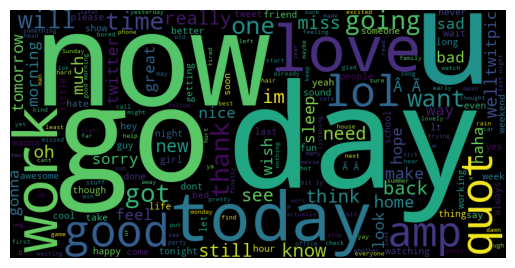

In [83]:
wc= WordCloud(width=800,height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [84]:
## spelling correction

In [85]:
!pip install -U textblob

In [87]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [88]:
from textblob import TextBlob


In [89]:
x= "thankss forr watching it "

In [90]:
x = TextBlob(x).correct()

In [91]:
x

TextBlob("thanks for watching it ")

In [92]:
## tokenization using textblob

In [93]:
y ='thanks# for watching thid video '

In [94]:
TextBlob(y).words

WordList(['thanks', 'for', 'watching', 'thid', 'video'])

In [95]:
doc = nlp(x)
for token in doc:
  print(token)

NameError: name 'nlp' is not defined

In [96]:
nlp = spacy.load("en_core_web_sm")

In [97]:
x = " Donald trump is the new president of united states of america "

In [98]:
doc = nlp(x)

In [99]:
for noun in doc.noun_chunks:
  print(noun)

 Donald trump
the new president
united states
america


In [100]:
## textblob inbuild sentiment classifier

In [101]:
from textblob.sentiments import NaiveBayesAnalyzer

In [108]:
x =' we are all in this togther anda we are gonna win this fight'

In [109]:
TextBlob(x, analyzer=NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.8548319493813485, p_neg=0.1451680506186515)